In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt

# Read data

In [3]:
INPUT_PATH = "/kaggle/input/ranzcr-clip-catheter-line-classification/"
TRAIN_PATH=INPUT_PATH+"train/"
TEST_PATH=INPUT_PATH+"test/"

print(f"Number of train images {len(os.listdir(TRAIN_PATH))}\nNumber of test images {len(os.listdir(TEST_PATH))}")

ANNOTATIONS=INPUT_PATH+"train.csv"

df_annotations=pd.read_csv(ANNOTATIONS)
df_annotations.head(20)

Number of train images 30083
Number of test images 3582


,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1
5,1.2.826.0.1.3680043.8.498.11707076266253086830...,0,0,1,0,0,0,1,0,0,1,0,8260896cf
6,1.2.826.0.1.3680043.8.498.23133310896792275593...,0,0,0,0,0,0,0,0,1,1,0,f6147af3f
7,1.2.826.0.1.3680043.8.498.17332833449968516367...,0,0,1,0,0,0,1,0,1,0,0,27413587b
8,1.2.826.0.1.3680043.8.498.91266853519846682206...,0,0,0,0,0,1,0,0,0,1,0,2edf3dce3
9,1.2.826.0.1.3680043.8.498.12706894217669234973...,0,1,0,0,0,0,1,0,0,1,0,3d5e7832e


# Exploration
## Number of images per patient

Text(0.5, 0, 'Number of samples per patient')

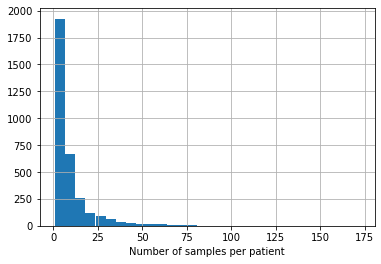

In [4]:
df_annotations.PatientID.value_counts().hist(bins=30)
plt.xlabel("Number of samples per patient")

## Targets: Percentages for each case

In [5]:
targets=["ETT - Abnormal","ETT - Borderline","ETT - Normal",
         "NGT - Abnormal","NGT - Borderline","NGT - Incompletely Imaged","NGT - Normal",
         "CVC - Abnormal","CVC - Borderline","CVC - Normal",
         "Swan Ganz Catheter Present"]

In [6]:
for tgt in targets:
    print(f"{tgt} is present in {df_annotations[tgt].sum()/df_annotations.shape[0]:.2f}% ({df_annotations[tgt].sum()}) of samples")

ETT - Abnormal is present in 0.00% (79) of samples
ETT - Borderline is present in 0.04% (1138) of samples
ETT - Normal is present in 0.24% (7240) of samples
NGT - Abnormal is present in 0.01% (279) of samples
NGT - Borderline is present in 0.02% (529) of samples
NGT - Incompletely Imaged is present in 0.09% (2748) of samples
NGT - Normal is present in 0.16% (4797) of samples
CVC - Abnormal is present in 0.11% (3195) of samples
CVC - Borderline is present in 0.28% (8460) of samples
CVC - Normal is present in 0.71% (21324) of samples
Swan Ganz Catheter Present is present in 0.03% (830) of samples


## Targets: Coocurrence

Text(0.5, 0, 'Number of positive targets')

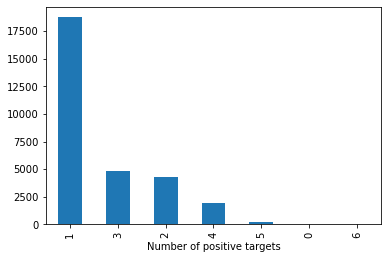

In [7]:
# Number of positive targets for sample
df_annotations[targets].sum(axis=1).value_counts().plot.bar()
plt.xlabel("Number of positive targets")

## Targets: Coocurrence - Most frequent target combination

In [8]:
df_annotations["all_targets"]=df_annotations[targets].values.tolist()
targets_counts=df_annotations["all_targets"].apply(tuple).value_counts()
targets_counts=targets_counts.reset_index()
targets_counts.columns=["all_targets","count"]
targets_counts

,all_targets,count
0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)",12763
1,"(0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",4038
2,"(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)",1678
3,"(0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0)",1428
4,"(0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)",973
...,...,...
206,"(0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0)",1
207,"(1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1)",1
208,"(0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0)",1
209,"(0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0)",1


In [9]:
def get_target_string(target_bools):
    positions=np.where(target_bools)[0]
    return " -- ".join([targets[pos] for pos in positions])

targets_counts.all_targets=targets_counts.all_targets.apply(get_target_string)
targets_counts.head()

,all_targets,count
0,CVC - Normal,12763
1,CVC - Borderline,4038
2,CVC - Abnormal,1678
3,ETT - Normal -- NGT - Normal -- CVC - Normal,1428
4,CVC - Borderline -- CVC - Normal,973


## Machine learning first approach

In [10]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.3.1


In [11]:
# Define the strategy

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Not connected to a TPU runtime. Using CPU/GPU strategy


In [12]:
from tensorflow.keras.applications import EfficientNetB3

# Transfer learning using efficientnet

IMG_SIZE=512
NUM_CLASSES=len(targets)
efficientnet=EfficientNetB3 #ResNet152


with strategy.scope():
    model = tf.keras.Sequential([
              tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
              efficientnet(include_top=False, weights='imagenet',),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(512,activation='relu'),
              tf.keras.layers.Dense(NUM_CLASSES,activation="sigmoid"), # multi-label
    ])
    
    #model.compile(
    #    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(multi_label=True)])
    

    
model.summary()

43941888/43941136 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, None, None, 1536)  10783535  
_________________________________________________________________
flatten (Flatten)            (None, 393216)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               201327104 
_________________________________________________________________
dense_1 (Dense)              (None, 11)                5643      
Total params: 212,116,282
Trainable params: 212,028,979
Non-trainable params: 87,303
_________________________________________________________________


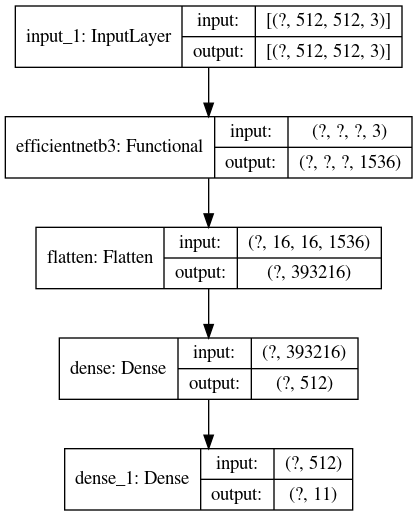

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png') 

In [14]:
for layer in model.layers:
    if layer.name == "efficientnetb3":
        layer.trainable=False

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, None, None, 1536)  10783535  
_________________________________________________________________
flatten (Flatten)            (None, 393216)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               201327104 
_________________________________________________________________
dense_1 (Dense)              (None, 11)                5643      
Total params: 212,116,282
Trainable params: 201,332,747
Non-trainable params: 10,783,535
_________________________________________________________________


### Input functions

In [16]:
from kaggle_datasets import KaggleDatasets
PATH_GCS = KaggleDatasets().get_gcs_path("ranzcr-clip-catheter-line-classification")

PATH_GCS_TRAINING=PATH_GCS+"/train_tfrecords/"+"*.tfrec"
filenames = tf.io.gfile.glob(PATH_GCS_TRAINING)
raw_dataset = tf.data.TFRecordDataset(filenames)


# Inspect a raw tfrecord
for raw_record in raw_dataset.take(1):
      print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b'\n\x83\xff\n\n\x17\n\x0eCVC - Abnormal\x12\x05\x1a\x03\n\x01\x00\n\xfb\xfb\n\n\x05image\x12\xf0\xfb\n\n\xec\xfb\n\n\xe8\xfb\n\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xc0\x00\x0b\x08\x04\x00\x04\x00\x01\x01\x11\x00\xff\xc4\x00\x1e\x00\x00\x02\x03\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x01\x00\x07\x08\t\n\xff\xc4\x00\\\x10\x00\x02\x01\x03\x03\x02\x04\x03\x06\x04\x02\x07\x03\x07\x01\x19\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13"Q\x072a\x08\x14#Bq\x81\tR\x91\xa1\x15b\x16$3r\xb1\xc1\xd1\nC\x92\x18\x19&v\x82\xa2\xe1\xf0\xf1\x17%f\x964SVcd\x83\x936DT\x86\xc2\xd2()59t\xb2\xb4\xff\xda\x00\x08\x01\x01\x00\x00?\x00\xfe\x08\xaf\x96[\x1b\x07\xefQ(\x84gj\

In [17]:
# https://www.tensorflow.org/tutorials/load_data/tfrecord#reading_a_tfrecord_file
# https://www.kaggle.com/venkat555/ranzcr-clip-tpu-densenet-with-kfold

feature_description = {
    "StudyInstanceUID"           : tf.io.FixedLenFeature([], tf.string),
    "image"                      : tf.io.FixedLenFeature([], tf.string),
    "ETT - Abnormal"             : tf.io.FixedLenFeature([], tf.int64), 
    "ETT - Borderline"           : tf.io.FixedLenFeature([], tf.int64), 
    "ETT - Normal"               : tf.io.FixedLenFeature([], tf.int64), 
    "NGT - Abnormal"             : tf.io.FixedLenFeature([], tf.int64), 
    "NGT - Borderline"           : tf.io.FixedLenFeature([], tf.int64), 
    "NGT - Incompletely Imaged"  : tf.io.FixedLenFeature([], tf.int64), 
    "NGT - Normal"               : tf.io.FixedLenFeature([], tf.int64), 
    "CVC - Abnormal"             : tf.io.FixedLenFeature([], tf.int64), 
    "CVC - Borderline"           : tf.io.FixedLenFeature([], tf.int64), 
    "CVC - Normal"               : tf.io.FixedLenFeature([], tf.int64), 
    "Swan Ganz Catheter Present" : tf.io.FixedLenFeature([], tf.int64),
}

def _parse_function(example_proto):
  # Parse the input `tf.train.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)


def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, [1024,1024, 3])
    return image

def input_fc(example_proto):
    example = _parse_function(example_proto)
    image = decode_image(example['image']) 
    image = tf.image.resize(image, [IMG_SIZE,IMG_SIZE])
    
    label=[tf.cast(example[lbl],tf.float32) for lbl in targets]
    #label=tf.one_hot(label, len(targets))
    
    return image,label

In [18]:
# Define a basic image augmentation with tensoflow

def augmentation(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.image.random_saturation(image, 0, 2)
    image = tf.image.adjust_saturation(image, 3)
    return image, label

In [19]:
def get_dataset(filenames,shuffle,batch_size,mode="train"):
    AUTOTUNE=tf.data.experimental.AUTOTUNE
    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTOTUNE)
    dataset = dataset.map(input_fc, num_parallel_calls=AUTOTUNE)
    if mode=="train": 
        dataset = dataset.map(augmentation, num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
        dataset = dataset.shuffle(shuffle)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(AUTOTUNE)
    return dataset

(1, 512, 512, 3) (1, 11)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


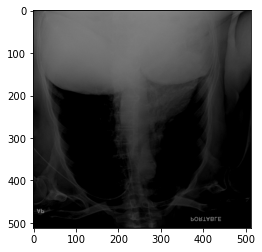

In [20]:
 for image,label in get_dataset(filenames,shuffle=1,batch_size=1).take(1):
    plt.figure()
    plt.imshow(image.numpy()[0])
    print(image.numpy().shape, label.numpy().shape)
    print(label.numpy())

In [21]:
## Train - validation split and input functions
len(filenames)
filenames_train = filenames[:12]
filenames_val = filenames[12:]

BATCH_SIZE = 256
SHUFFLE = 8


import re
# From https://www.kaggle.com/venkat555/ranzcr-clip-tpu-densenet-with-kfold
def count_data_items(filenames):
    #the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)
    #c = 0
    #for filename in filenames:
    #    c += sum(1 for _ in tf.data.TFRecordDataset(filename))
    #return c
NUM_TRAINING_IMAGES = count_data_items(filenames_train)
NUM_TEST_IMAGES = count_data_items(filenames_val)
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

def get_train_dataset():
    return get_dataset(filenames_train,BATCH_SIZE,SHUFFLE)


def get_val_dataset():
    return get_dataset(filenames_val,BATCH_SIZE,SHUFFLE,mode="val")



In [22]:
STEPS_PER_EPOCH

705

In [ ]:
%%time
EPOCHS=2000

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model.h5', save_best_only=True, monitor='val_auc', mode='max')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  min_delta=0, 
                                                  patience=50, verbose=0, 
                                                  restore_best_weights=True)
    


hist = model.fit(get_train_dataset(), epochs=EPOCHS,steps_per_epoch=STEPS_PER_EPOCH,
                 validation_data=get_val_dataset(),callbacks=[checkpoint, early_stopping],
                 )

Epoch 1/2000
 24/705 [>.............................] - ETA: 7:08 - loss: 5.4464 - auc: 0.4823